<a href="https://colab.research.google.com/github/Shivdutta/AdvanceCNN/blob/master/Pred_VGG16_notebook%5BAll_Predictions_Correct%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Using TensorFlow backend.


In [0]:
IMAGE_SIZE = [224, 224]

In [0]:
#Give dataset path
train_path = 'data/train'
test_path = 'data/test'

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

!unzip -q "/content/gdrive/My Drive/CNN_Images/VGG_class_data.zip"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
#!unzip 'data (1).zip'

In [0]:
!ls

'data (1).zip'	 data.zip   sample_data


In [10]:
# useful for getting number of classes
folders = glob('data/train/*')
print(len(folders))

4


In [0]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
#model.summary()

In [0]:
from keras import optimizers


sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [0]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [0]:
# Data Augmentation
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [17]:
# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 475 images belonging to 4 classes.


In [18]:
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 264 images belonging to 4 classes.


In [19]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

#lr_scheduler = LearningRateScheduler(lr_schedule)

#lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
#                               cooldown=0,
#                               patience=5,
#                               min_lr=0.5e-6)

#num_epochs = 1000
#num_batch_size = 32

checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=1, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5/5 [==============================] - 32s 6s/step - loss: 35.3379 - accuracy: 0.7188 - val_loss: 148.1454 - val_accuracy: 0.8761

Epoch 00001: val_loss improved from inf to 148.14537, saving model to mymodel.h5
Epoch 2/10
5/5 [==============================] - 22s 4s/step - loss: 82.3053 - accuracy: 0.8968 - val_loss: 199.9534 - val_accuracy: 0.7812

Epoch 00002: val_loss did not improve from 148.14537
Epoch 3/10
5/5 [==============================] - 27s 5s/step - loss: 81.8338 - accuracy: 0.8750 - val_loss: 226.3811 - val_accuracy: 0.8782

Epoch 00003: val_loss did not improve from 148.14537
Epoch 4/10
5/5 [==============================] - 23s 5s/step - loss: 80.6289 - accuracy: 0.9097 - val_loss: 19.1393 - val_accuracy: 0.9224

Epoch 00004: val_loss improved from 148.14537 to 19.13932, saving model to mymodel.h5
Epoch 5/10
5/5 [==============================] - 21s 4s/step - loss: 29.8360 - accuracy: 0.9688 - val_loss: 37.1784 - val_accuracy: 0.9065

Epoch 00005: val_loss did not 

Input Dimensions - Image :  (128, 128, 3)


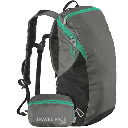

None
dict_keys(['backpack', 'footwear', 'glasses', 'watch'])
[[1.0000000e+00 1.6121785e-12 0.0000000e+00 0.0000000e+00]]


In [23]:
from matplotlib.pyplot import imshow
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

input_img_o= "/content/data/test/backpack/00000214.png"
input_img = io.imread(input_img_o)
input_img = cv2.resize(input_img, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
print('Input Dimensions - Image : ',input_img.shape)
print(cv2_imshow(input_img))

#Reference https://stackoverflow.com/questions/43017017/keras-model-predict-for-a-single-image
#Since you trained your model on mini-batches, your input is a tensor of shape [batch_size, image_width, image_height, number_of_channels].
#When predicting, you have to respect this shape even if you have only one image. Your input should be of shape: [1, image_width, image_height, number_of_channels].

from PIL import Image
#import numpy as np
from skimage import transform
def load(filename):
   input_img = io.imread(filename)
   np_image = cv2.resize(input_img, dsize=(224, 224))
   #np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load(input_img_o)
print((test_set.class_indices.keys()))
print(model.predict(image))

In [25]:
!ls /content/data/test/watch

00000000.jpg  00000016.jpg  00000032.jpeg  00000049.jpg   00000069.jpg
00000001.jpg  00000018.jpg  00000033.jpg   00000050.jpg   00000070.jpg
00000002.jpg  00000019.jpg  00000034.jpg   00000051.jpg   00000071.jpg
00000003.jpg  00000020.jpg  00000035.jpg   00000053.jpg   00000072.jpg
00000004.jpg  00000022.jpg  00000037.jpg   00000054.jpg   00000073.jpg
00000005.jpg  00000023.jpg  00000038.jpg   00000055.jpeg  00000074.jpg
00000006.jpg  00000024.jpg  00000039.jpeg  00000057.jpg   00000075.jpg
00000007.jpg  00000025.jpg  00000041.jpg   00000059.jpg   00000076.jpg
00000008.jpg  00000026.jpg  00000042.jpg   00000060.jpg   00000079.jpg
00000010.jpg  00000027.jpg  00000043.jpg   00000061.jpg   00000080.jpg
00000011.jpg  00000028.jpg  00000044.jpg   00000063.jpg
00000012.jpg  00000029.jpg  00000045.jpg   00000064.jpeg
00000014.jpg  00000030.jpg  00000046.jpg   00000066.jpg
00000015.jpg  00000031.jpg  00000048.jpeg  00000067.jpg


Input Dimensions - Image :  (128, 128, 3)


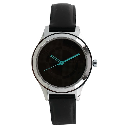

None
dict_keys(['backpack', 'footwear', 'glasses', 'watch'])
[[0. 0. 0. 1.]]


In [27]:
from matplotlib.pyplot import imshow
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

input_img_o= "/content/data/test/watch/00000049.jpg"
input_img = io.imread(input_img_o)
input_img = cv2.resize(input_img, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
print('Input Dimensions - Image : ',input_img.shape)
print(cv2_imshow(input_img))

#Reference https://stackoverflow.com/questions/43017017/keras-model-predict-for-a-single-image
#Since you trained your model on mini-batches, your input is a tensor of shape [batch_size, image_width, image_height, number_of_channels].
#When predicting, you have to respect this shape even if you have only one image. Your input should be of shape: [1, image_width, image_height, number_of_channels].

from PIL import Image
#import numpy as np
from skimage import transform
def load(filename):
   input_img = io.imread(filename)
   np_image = cv2.resize(input_img, dsize=(224, 224))
   #np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load(input_img_o)
print((test_set.class_indices.keys()))
print(model.predict(image))

In [28]:
!ls /content/data/test/glasses/

00000465.jpg  00000483.jpg  00000500.jpg   00000515.jpg   00000532.jpg
00000466.jpg  00000484.jpg  00000501.jpg   00000516.jpg   00000533.jpg
00000468.jpg  00000486.jpg  00000502.jpg   00000517.jpg   00000534.jpg
00000470.jpg  00000487.jpg  00000503.jpg   00000518.jpg   00000535.jpg
00000471.jpg  00000488.jpg  00000504.jpg   00000519.jpg   00000536.png
00000472.jpg  00000489.jpg  00000505.jpg   00000520.jpg   00000539.jpg
00000473.jpg  00000490.jpg  00000506.jpg   00000522.jpg   00000540.jpeg
00000475.jpg  00000491.jpg  00000507.jpg   00000523.jpeg  00000541.jpg
00000476.jpg  00000492.jpg  00000508.jpeg  00000524.jpg   00000542.jpg
00000477.jpg  00000495.jpg  00000509.jpg   00000525.jpg   00000543.jpg
00000479.jpg  00000496.jpg  00000511.jpg   00000526.jpg
00000480.jpg  00000497.jpg  00000512.jpg   00000528.jpg
00000481.jpg  00000498.jpg  00000513.jpg   00000529.jpg
00000482.jpg  00000499.jpg  00000514.jpg   00000530.jpg


Input Dimensions - Image :  (128, 128, 3)


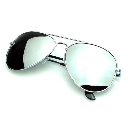

None
dict_keys(['backpack', 'footwear', 'glasses', 'watch'])
[[0. 0. 1. 0.]]


In [29]:
from matplotlib.pyplot import imshow
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

input_img_o= "/content/data/test/glasses/00000508.jpeg"
input_img = io.imread(input_img_o)
input_img = cv2.resize(input_img, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
print('Input Dimensions - Image : ',input_img.shape)
print(cv2_imshow(input_img))

#Reference https://stackoverflow.com/questions/43017017/keras-model-predict-for-a-single-image
#Since you trained your model on mini-batches, your input is a tensor of shape [batch_size, image_width, image_height, number_of_channels].
#When predicting, you have to respect this shape even if you have only one image. Your input should be of shape: [1, image_width, image_height, number_of_channels].

from PIL import Image
#import numpy as np
from skimage import transform
def load(filename):
   input_img = io.imread(filename)
   np_image = cv2.resize(input_img, dsize=(224, 224))
   #np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load(input_img_o)
print((test_set.class_indices.keys()))
print(model.predict(image))

In [30]:
!ls /content/data/test/footwear/

00000407.jpg  00000422.jpg  00000437.jpg   00000451.jpg  00000465.jpg
00000408.jpg  00000423.jpg  00000438.jpeg  00000452.jpg  00000466.jpeg
00000409.jpg  00000424.jpg  00000439.jpg   00000453.jpg  00000467.jpg
00000410.jpg  00000426.jpg  00000440.jpg   00000454.jpg  00000468.jpg
00000411.jpg  00000427.jpg  00000441.jpeg  00000455.JPG  00000469.jpeg
00000412.jpg  00000428.jpg  00000442.jpg   00000456.jpg  00000470.jpg
00000413.jpg  00000429.jpg  00000443.jpg   00000457.jpg  00000471.jpg
00000414.jpg  00000430.jpg  00000444.jpg   00000458.jpg  00000472.jpg
00000415.jpg  00000431.png  00000445.jpg   00000459.jpg  00000473.jpg
00000416.jpg  00000432.jpg  00000446.jpg   00000460.jpg  00000474.jpg
00000417.jpg  00000433.jpg  00000447.jpg   00000461.jpg
00000418.jpg  00000434.jpg  00000448.jpg   00000462.jpg
00000419.png  00000435.jpg  00000449.jpg   00000463.jpg
00000420.jpg  00000436.jpg  00000450.jpg   00000464.jpg


Input Dimensions - Image :  (128, 128, 3)


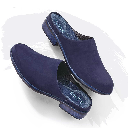

None
dict_keys(['backpack', 'footwear', 'glasses', 'watch'])
[[0. 1. 0. 0.]]


In [32]:
from matplotlib.pyplot import imshow
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

input_img_o= "/content/data/test/footwear/00000422.jpg"
input_img = io.imread(input_img_o)
input_img = cv2.resize(input_img, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
print('Input Dimensions - Image : ',input_img.shape)
print(cv2_imshow(input_img))

#Reference https://stackoverflow.com/questions/43017017/keras-model-predict-for-a-single-image
#Since you trained your model on mini-batches, your input is a tensor of shape [batch_size, image_width, image_height, number_of_channels].
#When predicting, you have to respect this shape even if you have only one image. Your input should be of shape: [1, image_width, image_height, number_of_channels].

from PIL import Image
#import numpy as np
from skimage import transform
def load(filename):
   input_img = io.imread(filename)
   np_image = cv2.resize(input_img, dsize=(224, 224))
   #np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load(input_img_o)
print((test_set.class_indices.keys()))
print(model.predict(image))